# Exploratory Data Analysis

In [2]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

## Load cleaned data

In [3]:
df = pd.read_csv('../data/clean_data.csv')
print("Data size", df.shape)
df.head()

Data size (104384, 19)


,date,location,x,y,longitude,latitude,environment,light,surface_condition,traffic_control,traffic_control_condition,collision_classification,impact_type,no_of_pedestrians,fid,collision_year,collision_month,collision_day,collision_hour
0,2013-01-18 05:00:00+00:00,ROBERTSON RD btwn MOODIE DR & VANIER RD,357144.87500,5020503.5,-75.832298,45.322533,01 - Clear,07 - Dark,01 - Dry,10 - No control,NaN,02 - Non-fatal injury,02 - Angle,0.0,1,2013.0,January,Friday,5
1,2013-01-20 05:00:00+00:00,FALLOWFIELD RD btwn EAGLESON RD & RICHMOND RD,356860.18750,5013034.5,-75.836708,45.255344,05 - Drifting Snow,01 - Daylight,06 - Ice,10 - No control,NaN,03 - P.D. only,01 - Approaching,0.0,2,2013.0,January,Sunday,5
2,2013-01-03 05:00:00+00:00,FIFTH AVE @ RUPERT ST,368589.71875,5029516.5,-75.685158,45.402679,03 - Snow,01 - Daylight,06 - Ice,02 - Stop sign,01 - Functioning,03 - P.D. only,02 - Angle,0.0,3,2013.0,January,Thursday,5
3,2013-01-12 05:00:00+00:00,BIRCH AVE @ FARNHAM CRES,370292.90625,5035187.0,-75.662651,45.453541,01 - Clear,01 - Daylight,02 - Wet,02 - Stop sign,01 - Functioning,03 - P.D. only,02 - Angle,0.0,4,2013.0,January,Saturday,5
4,2013-01-11 05:00:00+00:00,ALESTHER ST btwn QUEEN MARY ST & PRINCE ALBERT ST,372133.18750,5032130.5,-75.639542,45.425865,02 - Rain,07 - Dark,02 - Wet,10 - No control,NaN,03 - P.D. only,06 - SMV unattended vehicle,0.0,5,2013.0,January,Friday,5


# Data types

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104384 entries, 0 to 104383
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       104384 non-null  object 
 1   location                   104384 non-null  object 
 2   x                          104384 non-null  float64
 3   y                          104384 non-null  float64
 4   longitude                  104384 non-null  float64
 5   latitude                   104128 non-null  float64
 6   environment                104383 non-null  object 
 7   light                      104384 non-null  object 
 8   surface_condition          104384 non-null  object 
 9   traffic_control            104336 non-null  object 
 10  traffic_control_condition  46084 non-null   object 
 11  collision_classification   104384 non-null  object 
 12  impact_type                104384 non-null  object 
 13  no_of_pedestrians          10

# Collision Year
The year of collision contains 1970, which is absurd. We will fill those records with none

In [29]:
df.collision_year.value_counts()

2019.0    16399
2013.0    15156
2015.0    15080
2014.0    14843
2018.0    14484
2016.0    14028
Name: collision_year, dtype: int64

In [30]:
df.collision_year = df.collision_year.replace({1970: np.nan})

# Impact type

Text(0.5, 0, 'Count')

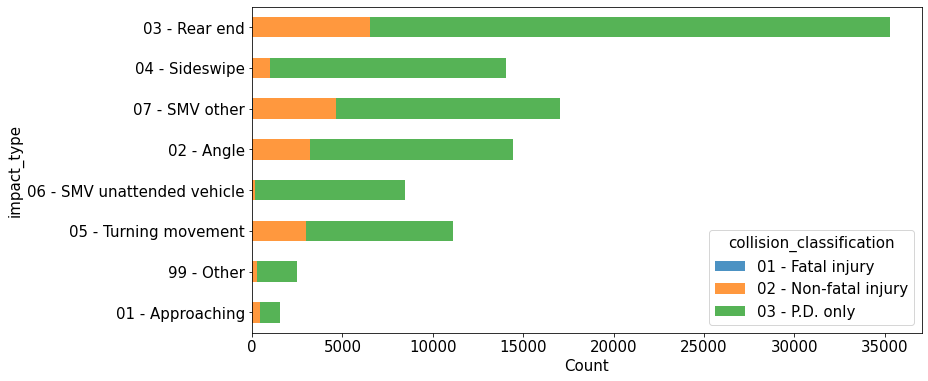

In [31]:
pvt = df.pivot_table('fid', index = 'impact_type',
                         columns = 'collision_classification', aggfunc = 'count')
pvt.sort_values(by =['03 - P.D. only']).plot(kind = 'barh', stacked = True, figsize = (12,6), alpha =0.8)
plt.xlabel('Count')

# Environment

Text(0.5, 0, 'Count')

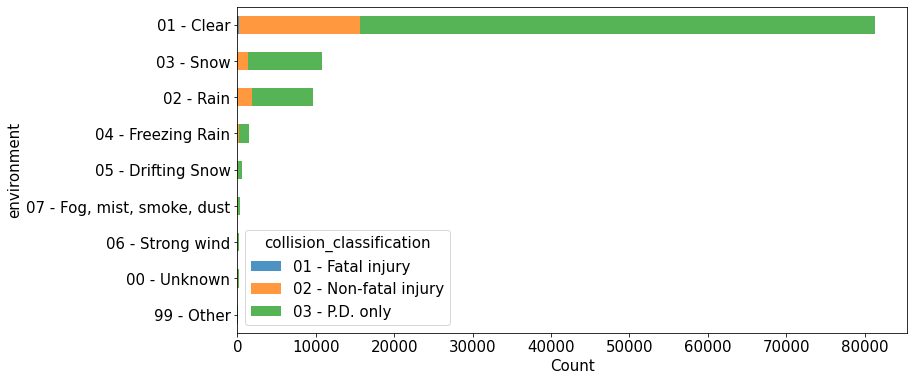

In [32]:
pvt = df.pivot_table('fid', index = 'environment',
                         columns = 'collision_classification', aggfunc = 'count')
pvt.sort_values(by =['03 - P.D. only']).plot(kind = 'barh', stacked = True, figsize = (12,6), alpha =0.8)
plt.xlabel('Count')

# Surface Condition

Text(0.5, 0, 'Count')

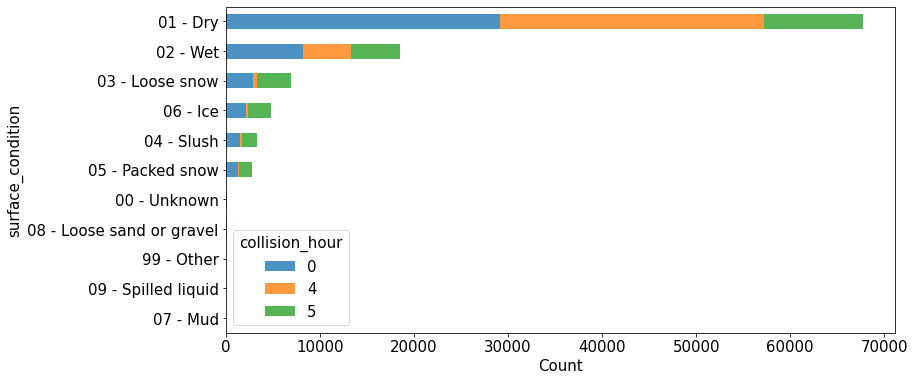

In [33]:
pvt = df.pivot_table('fid', index = 'surface_condition',
                         columns = 'collision_hour', aggfunc = 'count')
pvt.sort_values(by =[0]).plot(kind = 'barh', stacked = True, figsize = (12,6), alpha =0.8)
plt.xlabel('Count')

#  Descriptive Statistics

In [34]:
df.describe()

,x,y,longitude,latitude,no_of_pedestrians,fid,collision_year,collision_hour
count,104384.000000,1.043840e+05,104384.000000,104128.000000,104384.000000,104384.000000,89990.000000,104384.000000
mean,367044.372289,5.026072e+06,-75.705261,45.372564,0.017369,7473.440594,2015.865885,2.504033
std,9531.931580,7.480827e+03,0.122132,0.064958,0.137292,4334.837532,2.146871,2.222892
min,317371.280600,4.981006e+06,-76.339368,45.083775,0.000000,1.000000,2013.000000,0.000000
25%,363272.781250,5.021995e+06,-75.753790,45.335799,0.000000,3728.750000,2014.000000,0.000000
50%,367802.180600,5.027338e+06,-75.695194,45.383488,0.000000,7456.500000,2015.000000,4.000000
75%,371903.023438,5.031352e+06,-75.643042,45.419236,0.000000,11184.250000,2018.000000,4.000000
max,401809.000000,5.043440e+06,-75.261742,45.524933,4.000000,16399.000000,2019.000000,5.000000


# Histogram

Notice that the variables x and y are the same as latitude and longitude

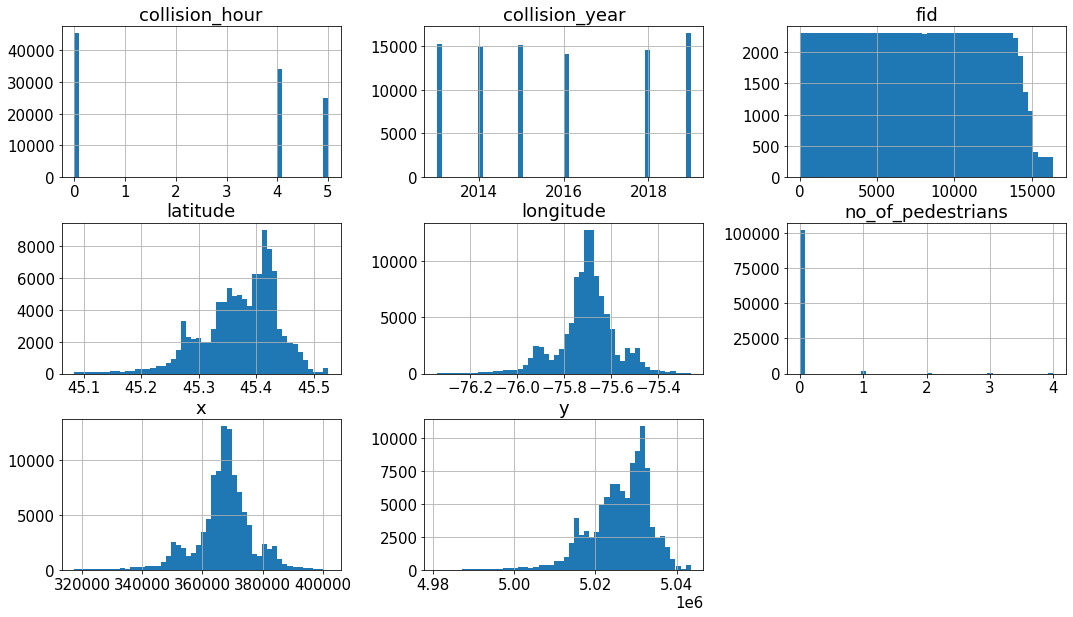

In [35]:
df.hist(bins = 50, figsize = (18,10))
plt.show()

# Clean Up Extreme Outliers: Tukey IQR

In [36]:
# Calculate first and third quartile
QR_1st = df['latitude'].describe()['25%']
QR_3rd = df['latitude'].describe()['75%']

# Interquartile range
IQR = QR_3rd - QR_1st

# Lower and upper bounds
lower_bound = QR_1st - 3*IQR
upper_bound = QR_3rd + 3*IQR

# Remove outliers in the X attribute
df['latitude'] =  df['latitude'][(df['latitude'] > lower_bound)&(df['latitude'] < upper_bound)] 

# Collision by Latitude and Longitude

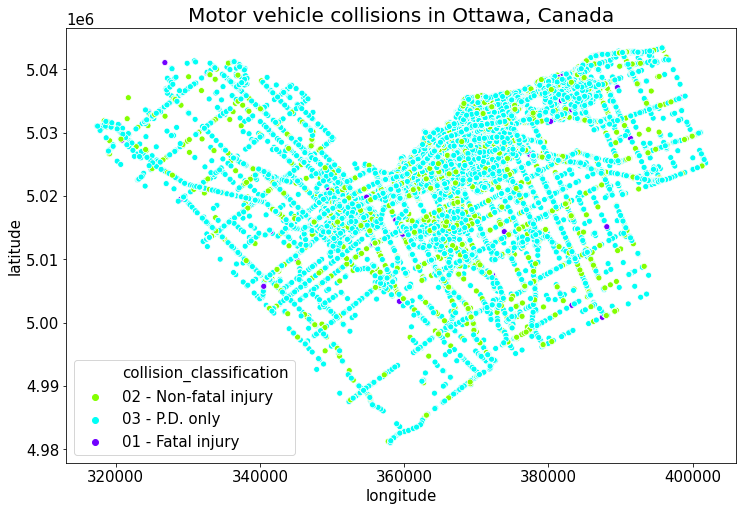

In [20]:
# Plot
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'collision_classification',  palette="hsv")
plt.title('Motor vehicle collisions in Ottawa, Canada', fontsize = 20)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig('../image/map.png')

# Box Plots

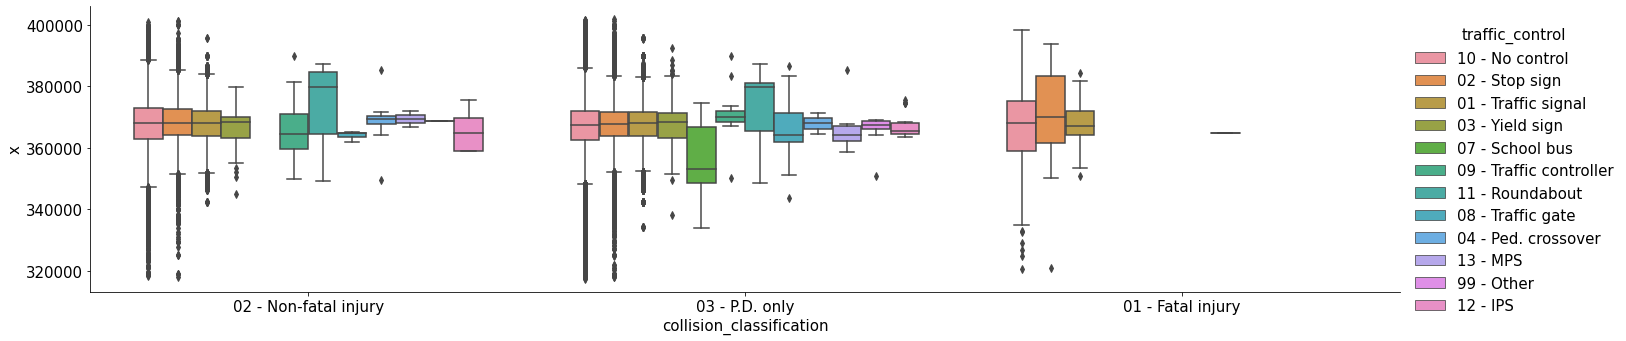

In [38]:
# Make count plot of impact type
sns.catplot(x = 'collision_classification', y = 'x', data = df, kind = 'box', aspect = 4.0, 
               height = 5, hue = 'traffic_control')

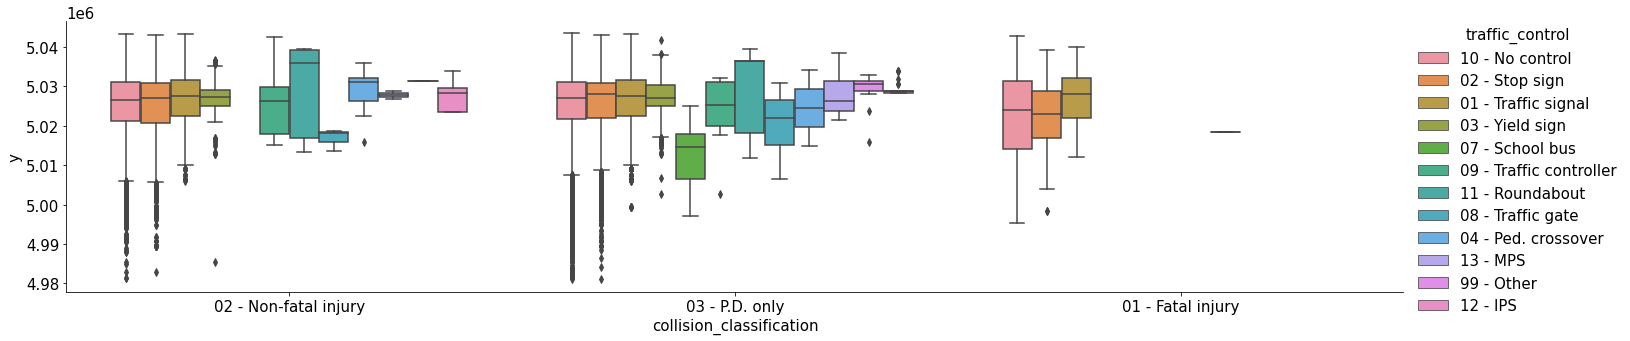

In [39]:
# Make count plot of impact type
sns.catplot(x = 'collision_classification', y = 'y', data = df, kind = 'box', aspect = 4.0, 
               height = 5, hue = 'traffic_control')

In [40]:
df.to_csv('../data/clean_data.csv', index = False)